In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import scipy.stats as sps
import numpy as np
import statsmodels.api as sm
import random
import statistics
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler

Читаем файл

In [3]:
df=pd.read_csv('/content/taxi.csv')
df

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2863541,2,2016-01-31 13:12:20,2016-01-31 13:21:37,2,-73.989609,40.741718,-73.991013,40.755867,N,557
1,id1752141,1,2016-05-03 18:20:59,2016-05-03 18:41:09,1,-73.993935,40.761517,-73.975281,40.751507,N,1210
2,id1331142,1,2016-06-05 02:20:39,2016-06-05 02:28:04,1,-73.988625,40.722538,-73.980347,40.742752,N,445
3,id0227018,2,2016-01-11 20:07:13,2016-01-11 20:14:26,1,-73.976723,40.775311,-73.964333,40.765560,N,433
4,id2263790,2,2016-01-22 00:31:59,2016-01-22 00:40:48,5,-74.005852,40.740360,-73.988708,40.758781,N,529
...,...,...,...,...,...,...,...,...,...,...,...
99995,id1085998,2,2016-05-10 17:09:15,2016-05-10 17:28:13,1,-73.990089,40.751648,-73.981262,40.784264,N,1138
99996,id1119642,1,2016-02-13 23:25:04,2016-02-13 23:32:14,1,-73.985161,40.774433,-73.976547,40.790916,N,430
99997,id3739873,2,2016-04-19 17:22:31,2016-04-19 17:43:12,1,-73.975052,40.756241,-73.984818,40.769341,N,1241
99998,id1863124,2,2016-06-22 20:50:36,2016-06-22 21:04:30,1,-73.983192,40.744656,-73.950607,40.783321,N,834


In [4]:
df['pickup_datetime'] = pd.to_datetime(df['pickup_datetime']).dt.normalize()
df['dropoff_datetime'] = pd.to_datetime(df['dropoff_datetime']).dt.normalize()
df['pickup_datetime'].dtypes

dtype('<M8[ns]')

Сортируем поездки по выходным дням

In [5]:
filter_data = df.loc[df['pickup_datetime'].dt.weekday.isin([5,6])]
filter_data

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2863541,2,2016-01-31,2016-01-31,2,-73.989609,40.741718,-73.991013,40.755867,N,557
2,id1331142,1,2016-06-05,2016-06-05,1,-73.988625,40.722538,-73.980347,40.742752,N,445
5,id3105911,2,2016-03-12,2016-03-12,5,-73.989853,40.762321,-73.990356,40.719570,N,1270
6,id3638379,1,2016-02-27,2016-02-27,1,-73.981590,40.773579,-73.985977,40.726574,N,2235
9,id0280140,1,2016-04-09,2016-04-09,1,-73.989906,40.756668,-73.987427,40.768623,N,658
...,...,...,...,...,...,...,...,...,...,...,...
99988,id2622579,2,2016-03-06,2016-03-06,1,-73.988487,40.759212,-74.003883,40.747547,N,537
99990,id3919255,1,2016-04-10,2016-04-10,2,-73.961388,40.774467,-73.969559,40.760349,N,481
99992,id2189210,2,2016-01-23,2016-01-23,1,-73.996338,40.763706,-73.948715,40.815403,N,1052
99994,id0959872,2,2016-03-27,2016-03-27,6,-73.984451,40.768520,-73.973640,40.763699,N,242


Считываем колиество поездок по месяцам

In [7]:
filter_data.groupby(filter_data['pickup_datetime'].dt.month_name()).id.count()

pickup_datetime
April       5279
February    4650
January     4610
June        4201
March       4694
May         4977
Name: id, dtype: int64

Создаем свой Датасет

In [9]:
symbols="1234567890abcdefghigk"
list_for_id=[]
list_for_order_number=[]
day_of_week=[]

for i in range(10000):
  id=''
  for i in range(15):
    #выбор случйного символа из списка символов по индексу
    id+=symbols[random.randint(0,len(symbols)-1)]
  list_for_id.append(id)
  #добавления случайных значений для номеров заказов
  list_for_order_number.append(random.randint(1,10))

  #добавление дней недели по вероятностям
  rand=round(random.uniform(0,0.35),2)
  if rand<=0.35 and rand>0.25:
    day_of_week.append(1)
  elif rand<=0.25 and rand>0.2:
    day_of_week.append(2)
  elif rand<=0.2 and rand>0.15:
    day_of_week.append(3)
  elif rand<=0.15 and rand>0.05:
    day_of_week.append(4)
  else:
    day_of_week.append(5)

#нормальное распределение
delivery_time=sps.norm.rvs(loc=1440,scale=200,size=10000)
#экспоненциальное распределение
order_cost=sps.expon.rvs(scale=1+1,size=10000)

data=pd.DataFrame({'user_id': list_for_id,
                   'number': list_for_order_number,
                   'time': delivery_time,
                   'cost': order_cost,
                   'retention': day_of_week})

In [10]:
data

,user_id,number,time,cost,retention
0,ifc5ge4gb08ede2,2,1596.892309,0.277160,3
1,gbek1g6c29c2ah8,2,1411.439461,3.756494,4
2,g174hi8cfgg2h90,9,1085.210292,1.826912,5
3,000fdcc735264ig,8,1160.129421,1.546957,5
4,ffcbhkh0ia98ehg,7,1212.981910,2.089860,2
...,...,...,...,...,...
9995,c1fe930dh6b5f77,9,1684.848732,1.934462,1
9996,5kedc2ahee9f4g5,3,1380.661166,0.423988,5
9997,fi09f3b477f41g2,7,1164.771462,3.857151,2
9998,2gd38fk4ka8ige0,6,1452.219367,2.487559,4


Делаем проверку на дубликаты

In [11]:
data.duplicated().value_counts()
data.drop_duplicates()

,user_id,number,time,cost,retention
0,ifc5ge4gb08ede2,2,1596.892309,0.277160,3
1,gbek1g6c29c2ah8,2,1411.439461,3.756494,4
2,g174hi8cfgg2h90,9,1085.210292,1.826912,5
3,000fdcc735264ig,8,1160.129421,1.546957,5
4,ffcbhkh0ia98ehg,7,1212.981910,2.089860,2
...,...,...,...,...,...
9995,c1fe930dh6b5f77,9,1684.848732,1.934462,1
9996,5kedc2ahee9f4g5,3,1380.661166,0.423988,5
9997,fi09f3b477f41g2,7,1164.771462,3.857151,2
9998,2gd38fk4ka8ige0,6,1452.219367,2.487559,4


In [12]:
data.shape

(10000, 5)

Дополняем датасет столбцом среднеего времени доставки

In [13]:
data['average_delivery_time'] = data.groupby(['number'])['time'].transform('mean')
data

,user_id,number,time,cost,retention,average_delivery_time
0,ifc5ge4gb08ede2,2,1596.892309,0.277160,3,1435.836812
1,gbek1g6c29c2ah8,2,1411.439461,3.756494,4,1435.836812
2,g174hi8cfgg2h90,9,1085.210292,1.826912,5,1440.566562
3,000fdcc735264ig,8,1160.129421,1.546957,5,1437.447102
4,ffcbhkh0ia98ehg,7,1212.981910,2.089860,2,1441.495155
...,...,...,...,...,...,...
9995,c1fe930dh6b5f77,9,1684.848732,1.934462,1,1440.566562
9996,5kedc2ahee9f4g5,3,1380.661166,0.423988,5,1440.039811
9997,fi09f3b477f41g2,7,1164.771462,3.857151,2,1441.495155
9998,2gd38fk4ka8ige0,6,1452.219367,2.487559,4,1420.271160


Определяем сегмент,к которому относиться заказчик 

In [14]:
segment=[]
for i in data['number']: #запись сегментов в массив
  if i==data['number'].min():
    order_segment=f'{i}-{i+2}'
  elif i==data['number'].max():
    order_segment=f'{i-2}-{i}'
  else: 
    order_segment=f'{i-1}-{i+1}'
  segment.append(order_segment)

data['customer_segment']=segment

data

,user_id,number,time,cost,retention,average_delivery_time,customer_segment
0,ifc5ge4gb08ede2,2,1596.892309,0.277160,3,1435.836812,1-3
1,gbek1g6c29c2ah8,2,1411.439461,3.756494,4,1435.836812,1-3
2,g174hi8cfgg2h90,9,1085.210292,1.826912,5,1440.566562,8-10
3,000fdcc735264ig,8,1160.129421,1.546957,5,1437.447102,7-9
4,ffcbhkh0ia98ehg,7,1212.981910,2.089860,2,1441.495155,6-8
...,...,...,...,...,...,...,...
9995,c1fe930dh6b5f77,9,1684.848732,1.934462,1,1440.566562,8-10
9996,5kedc2ahee9f4g5,3,1380.661166,0.423988,5,1440.039811,2-4
9997,fi09f3b477f41g2,7,1164.771462,3.857151,2,1441.495155,6-8
9998,2gd38fk4ka8ige0,6,1452.219367,2.487559,4,1420.271160,5-7


Считаем моду,медиану,среднее значение,дисперсию и стандартное отклонение

In [15]:
print(f"Мода: {statistics.mode(data['cost'])}")
print(f"Медиана: {np.median(data['cost'])}")
print(f"Среднее: {np.mean(data['cost'])}")
print(f"Дисперсия: {np.var(data['cost'])}")
print(f"Стандартное отклонение: {np.std(data['cost'])}")

Мода: 0.2771602119851169
Медиана: 1.3515086088737007
Среднее: 1.938360141841237
Дисперсия: 3.695705714066466
Стандартное отклонение: 1.9224218356194527


Строим график

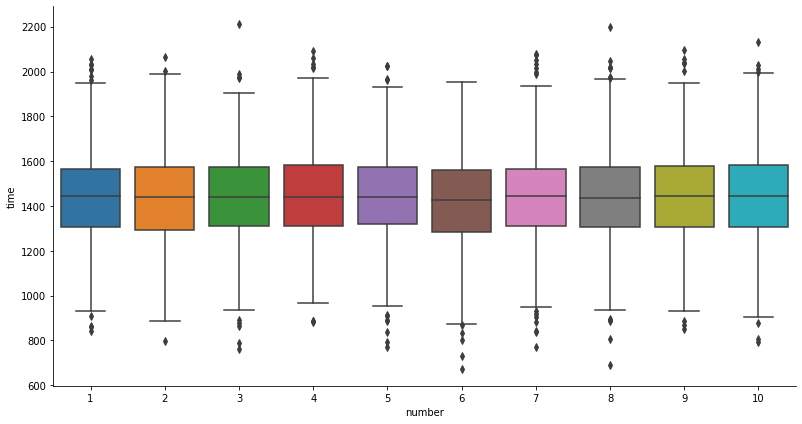

In [16]:
sns.catplot(data=data, x="number", y="time", kind="box",height=6, aspect=15/8)

График распределения заказов

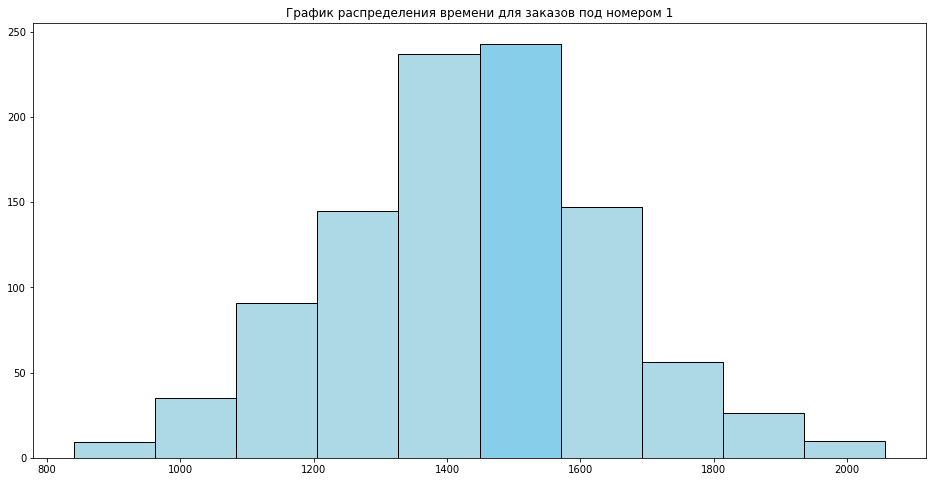

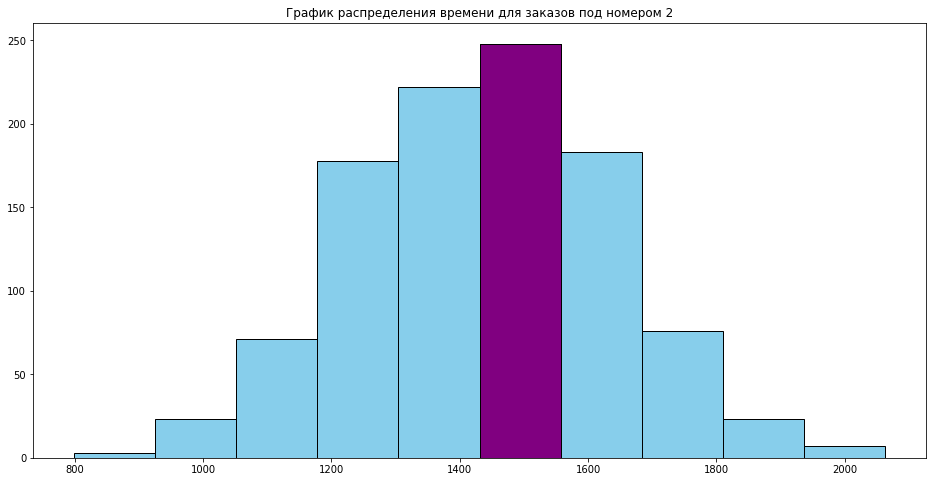

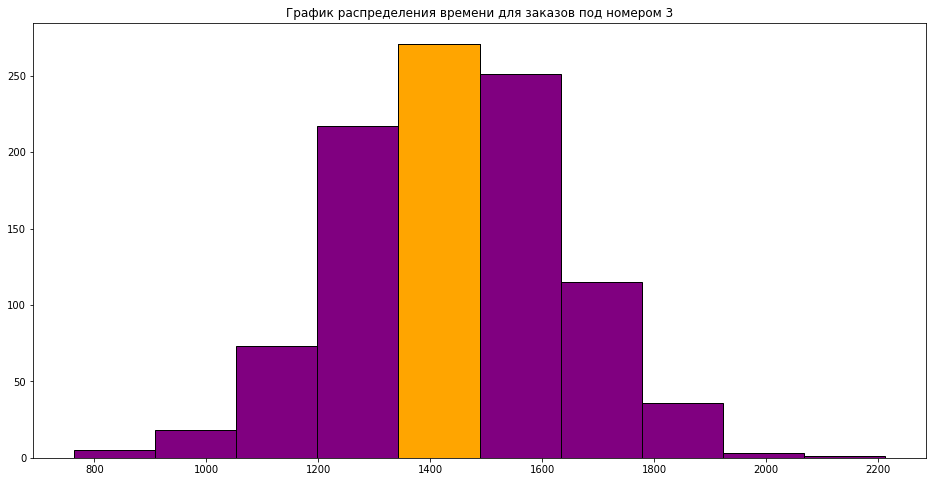

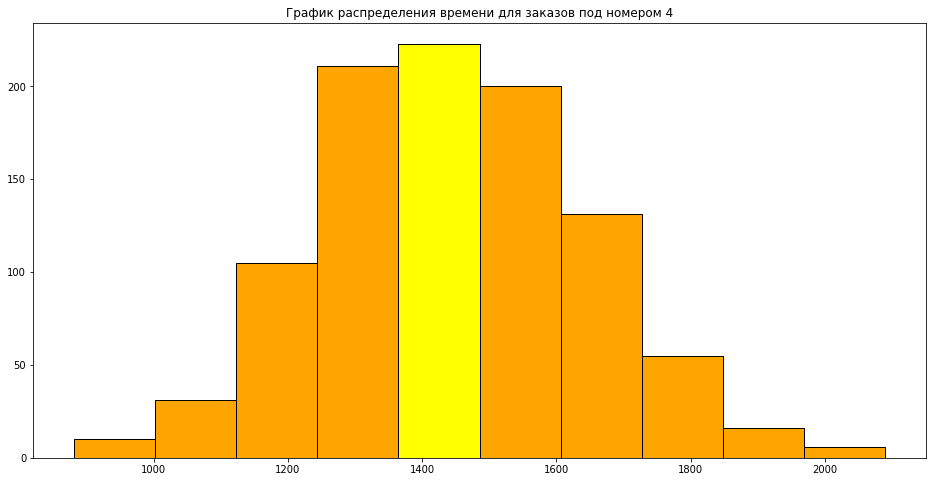

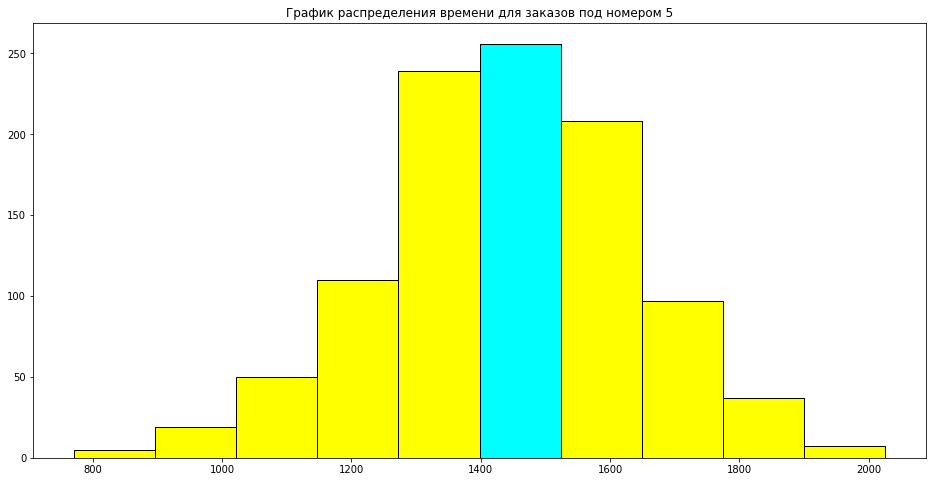

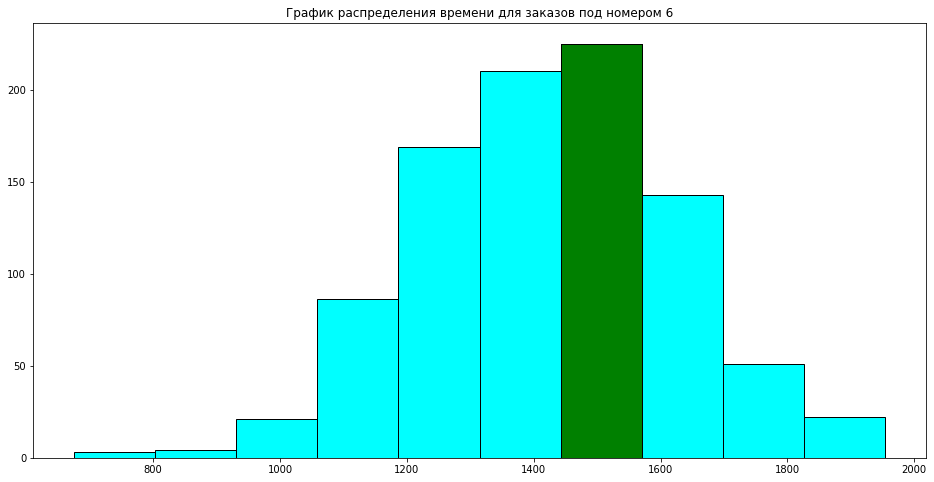

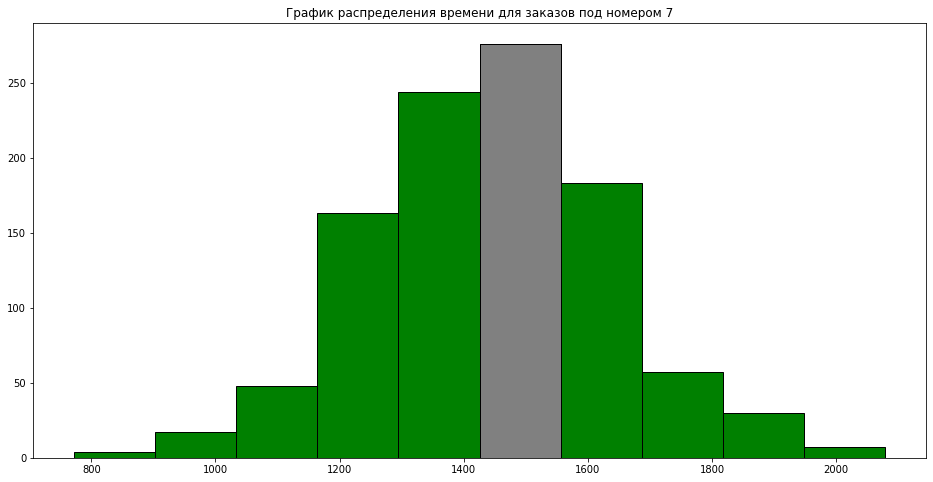

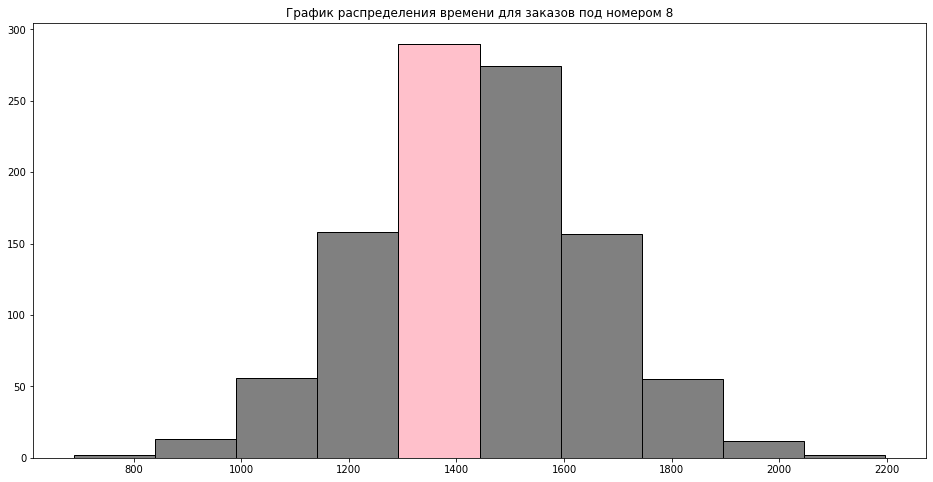

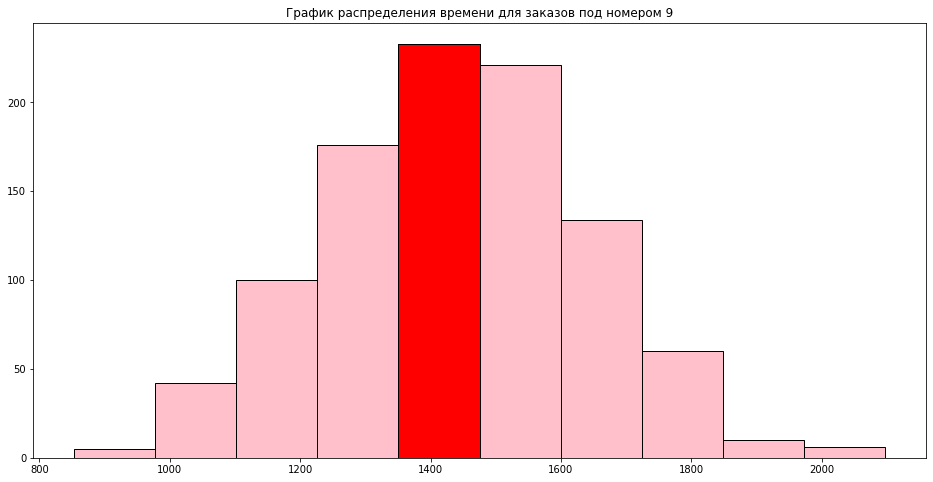

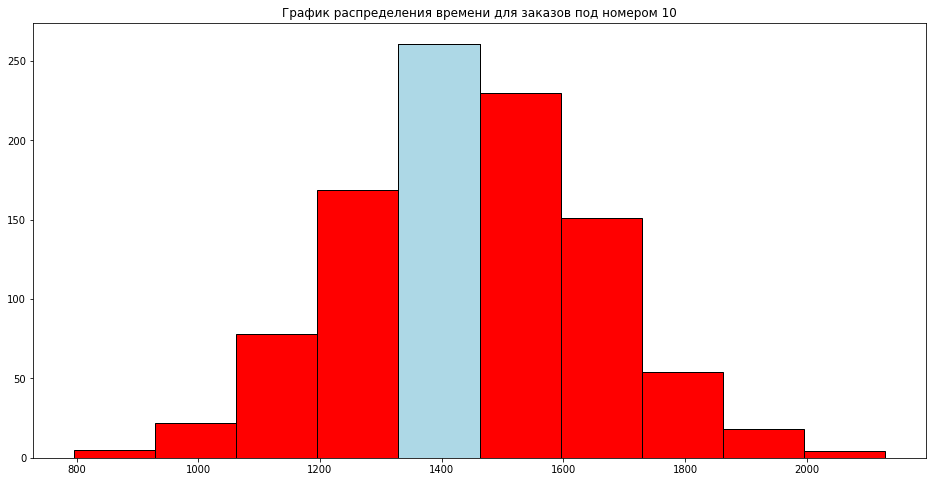

In [18]:
count=0

def dal(num):
  global count
  # fig, ax = plt.subplots()
  plt.figure(figsize=(16,8))
  lst_height=[]
  lst_width=[]
  lst_xy=[]
  colors=['lightblue','skyblue','purple','orange','yellow','cyan','green','grey','pink','red']
  data1=data.loc[(data["number"]==num), "time"]
  plt.hist(data1,edgecolor='black',color=colors[num-1])
  v=plt.gca()
  p=v.patches
  for i in range(200000):
    try:
      lst_height.append(p[i].get_height())
      lst_width.append(p[i].get_width())
      lst_xy.append(p[i].get_xy()[0])
    except:
      break

  index=(lst_height.index(max(lst_height)))
  plt.bar(lst_xy[index]+lst_width[index]/2,height=lst_height[index],width=lst_width[index],color=colors[-(len(colors)-1)+count],edgecolor='black')
  plt.title(f'График распределения времени для заказов под номером {num}')
  plt.show()

  count+=1

for i in range(1,11):
  dal(i)

Класстеризация

In [19]:
scaler=MinMaxScaler()
scaler.fit(data[['cost']])
data['cost']=scaler.transform(data[['cost']])
scaler.fit(data[['time']])
data.delivery_time=scaler.transform(data[['time']])
data

<ipython-input-19-5586255a47f1>:5: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  data.delivery_time=scaler.transform(data[['time']])


,user_id,number,time,cost,retention,average_delivery_time,customer_segment
0,ifc5ge4gb08ede2,2,1596.892309,0.016088,3,1435.836812,1-3
1,gbek1g6c29c2ah8,2,1411.439461,0.218132,4,1435.836812,1-3
2,g174hi8cfgg2h90,9,1085.210292,0.106082,5,1440.566562,8-10
3,000fdcc735264ig,8,1160.129421,0.089825,5,1437.447102,7-9
4,ffcbhkh0ia98ehg,7,1212.981910,0.121351,2,1441.495155,6-8
...,...,...,...,...,...,...,...
9995,c1fe930dh6b5f77,9,1684.848732,0.112327,1,1440.566562,8-10
9996,5kedc2ahee9f4g5,3,1380.661166,0.024614,5,1440.039811,2-4
9997,fi09f3b477f41g2,7,1164.771462,0.223977,2,1441.495155,6-8
9998,2gd38fk4ka8ige0,6,1452.219367,0.144445,4,1420.271160,5-7


In [ ]:
km=KMeans(n_clusters=3)
y_predicted=km.fit_predict(data[['cost','time']])

#присваивание номеров кластеров пользователям
data['cluster']=y_predicted

km.cluster_centers_

array([[1.09288633e-01, 1.44632578e+03],
       [1.10727327e-01, 1.20857273e+03],
       [1.13036080e-01, 1.68816891e+03]])

,user_id,number,time,cost,retention,average_delivery_time,customer_segment,cluster
1,g75kbdg4ege03ic,9,1494.077536,0.062304,5,1438.792538,8-10,0
3,9gb5e2ffi88kg7f,6,1351.771565,0.008058,2,1451.801400,5-7,0
4,02657412a8gcik5,8,1397.609086,0.163311,1,1441.669910,7-9,0
7,5k4gh449kb4f4ge,1,1473.078441,0.007225,4,1431.699297,1-3,0
11,9566a9180c2k3e9,1,1497.670167,0.157105,2,1431.699297,1-3,0
...,...,...,...,...,...,...,...,...
9988,e3d360h6he8bhe4,1,1558.883910,0.000314,5,1431.699297,1-3,0
9992,9hd71h9c35i90ge,9,1503.517736,0.009281,3,1438.792538,8-10,0
9995,d5k80h7328b7d33,5,1555.596792,0.140871,1,1445.362097,4-6,0
9996,eigg67ahibf40g8,6,1505.663461,0.031557,1,1451.801400,5-7,0


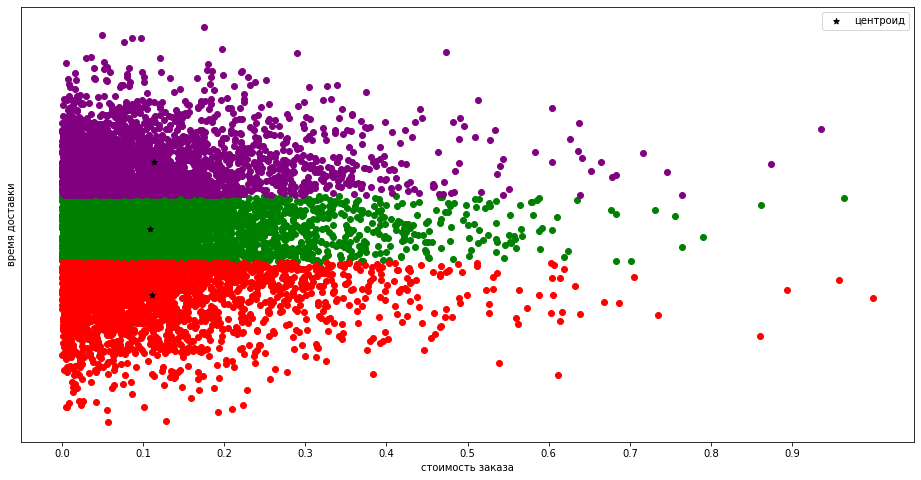

In [ ]:
data1=data[data.cluster==0]
data2=data[data.cluster==1]
data3=data[data.cluster==2]

plt.figure(figsize=(16,8))

plt.scatter(data1.cost,data1.time,color='green')
plt.scatter(data2.cost,data2.time,color='red')
plt.scatter(data3.cost,data3.time,color='purple')
plt.xticks(np.arange(0, 1, step=0.1))
plt.yticks(np.arange(0, 1, step=0.1))
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='black',marker='*',label='центроид')


plt.xlabel('стоимость заказа')
plt.ylabel('время доставки')
plt.legend()
data1

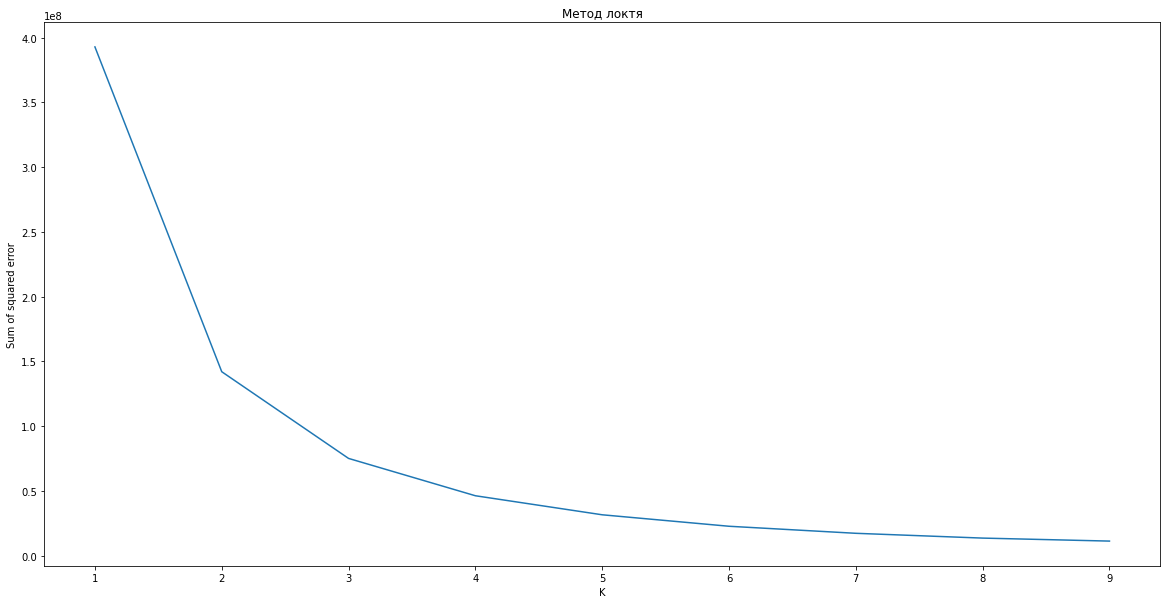

In [ ]:
k_rng=range(1,10)
sse=[]
for k in k_rng:
  km=KMeans(n_clusters=k)
  km.fit(data[['number','time']])
  sse.append(km.inertia_)

plt.figure(figsize=(20,10))
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.title('Метод локтя')
plt.plot(k_rng,sse)

In [ ]:
one=np.mean(data2['time'])
second=np.mean(data2['cost'])
print(f'Второй кластер:\nСреднее время доставки: {one}\nСредняя стоимость заказа: {second}')

one=np.mean(data3['time'])
second=np.mean(data3['cost'])
print(f'\nТретий кластер:\nСреднее время доставки: {one}\nСредняя стоимость заказа: {second}')

Второй кластер:
Среднее время доставки: 1208.6136940723068
Средняя стоимость заказа: 0.11073213306791001

Третий кластер:
Среднее время доставки: 1688.445297616154
Средняя стоимость заказа: 0.11316472861172548
